# Representación gráfica de las relaciones de dispersión TFG (matplotlib)

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const #De aquí puedo obtener las constantes físicas para el w_D
%config InlineBackend.figure_format = 'retina'  # para que se me vean en alta resolución  || tal cual copiado de google no sé que significa

In [127]:
#Parámetros
Ef = 0.63*const.e
w_D = 2*Ef*const.alpha/const.h
    #Si02
eps_inf_si = 2.1
w_l0_si = 1244*200*const.pi*const.c #cm^-1 * 2pi*c
w_t0_si = 1052*200*const.pi*const.c  #cm^-1 * 2pi*c
y_0_si = 0.073*w_l0_si 
    #Al2O3
eps_inf_al = 2.5
w_l0_al = 936*200*const.pi*const.c  #cm^-1 * 2pi*c
w_t0_al = 772*200*const.pi*const.c  #cm^-1 * 2pi*c
y_0_al = 0.18*w_l0_al
w_D
w_l0_al

176309786700108.66

# Grafeno

## 1. Polaritón plasmónico de grafeno

Relación de dispersión $w^2 = \frac{2\cdot k_x \cdot w_D \cdot c}{\epsilon_1+\epsilon_2} $

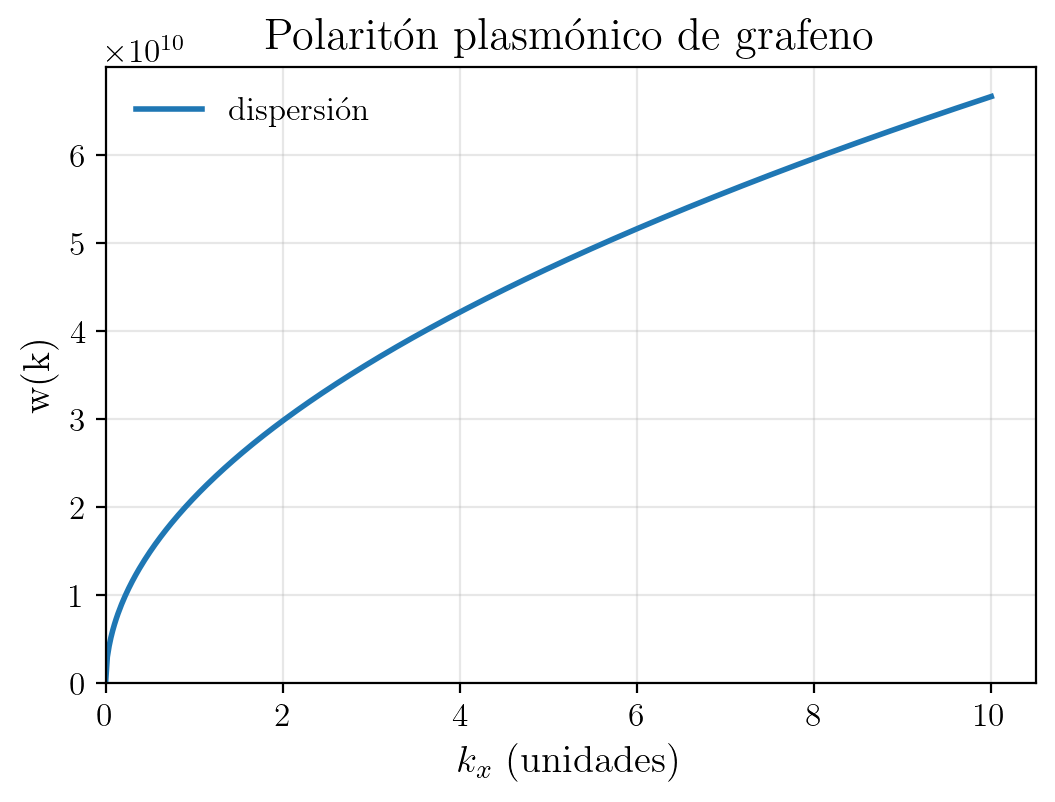

In [128]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritón plasmónico de grafeno") #Título de la gráfica
x = np.linspace(0,10,500)
y = (2*x*const.c*w_D/(1+2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y,label='dispersión')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper left", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 2. Polaritón plasmónico de grafeno: dos monocapas

Relación de dispersión $w_1^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot senh(d\cdot k_x/2)}{\epsilon_1senh(d\cdot k_x/2)+\epsilon_2cosh(d\cdot k_x/2)} $ y $w_2^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot cosh(d\cdot k_x/2)}{\epsilon_1senh(d\cdot k_x/2)+\epsilon_2cosh(d\cdot k_x/2)} $

In [129]:
#Definición de d - parámetro de cuentas
d = 2 # Por ahora arbitrario

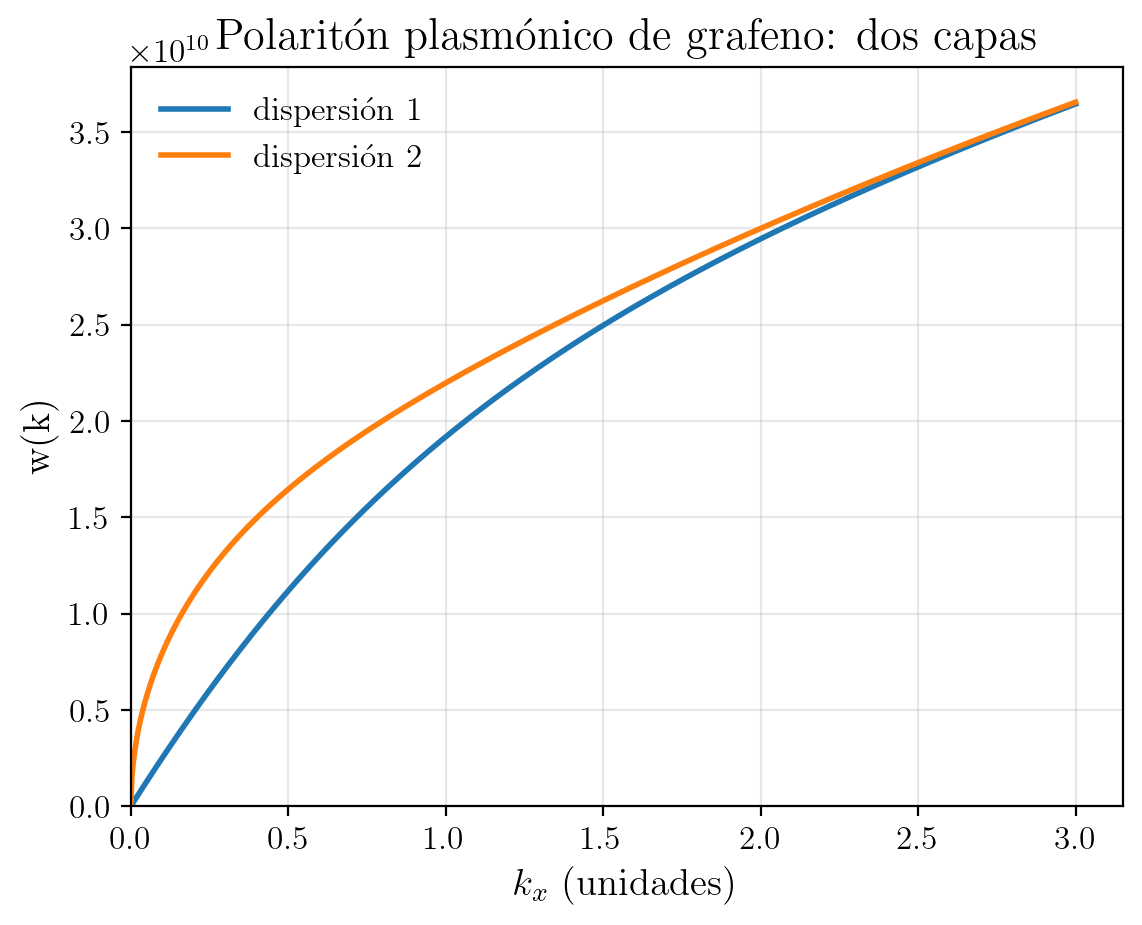

In [130]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno: dos capas") #Título de la gráfica
x = np.linspace(0,3,1000)
y_1 = np.sqrt((2*x*const.c*w_D*np.sinh(x*d/2)/(1*np.sinh(x*d/2)+2*np.cosh(x*d/2)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
y_2 = np.sqrt((2*x*const.c*w_D*np.cosh(x*d/2)/(1*np.sinh(x*d/2)+2*np.cosh(x*d/2)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y_1,label='dispersión 1')
ax.plot(x,y_2,label='dispersión 2')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper left", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 3. Polaritón plasmónico de grafeno acústico I

Relación de dispersión $w^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot senh(d\cdot k_x)}{\epsilon_1senh(d\cdot k_x)+\epsilon_2cosh(d\cdot k_x)} $

In [131]:
#Definición de d - parámetro de cuentas
d = 0.03 # Por ahora arbitrario

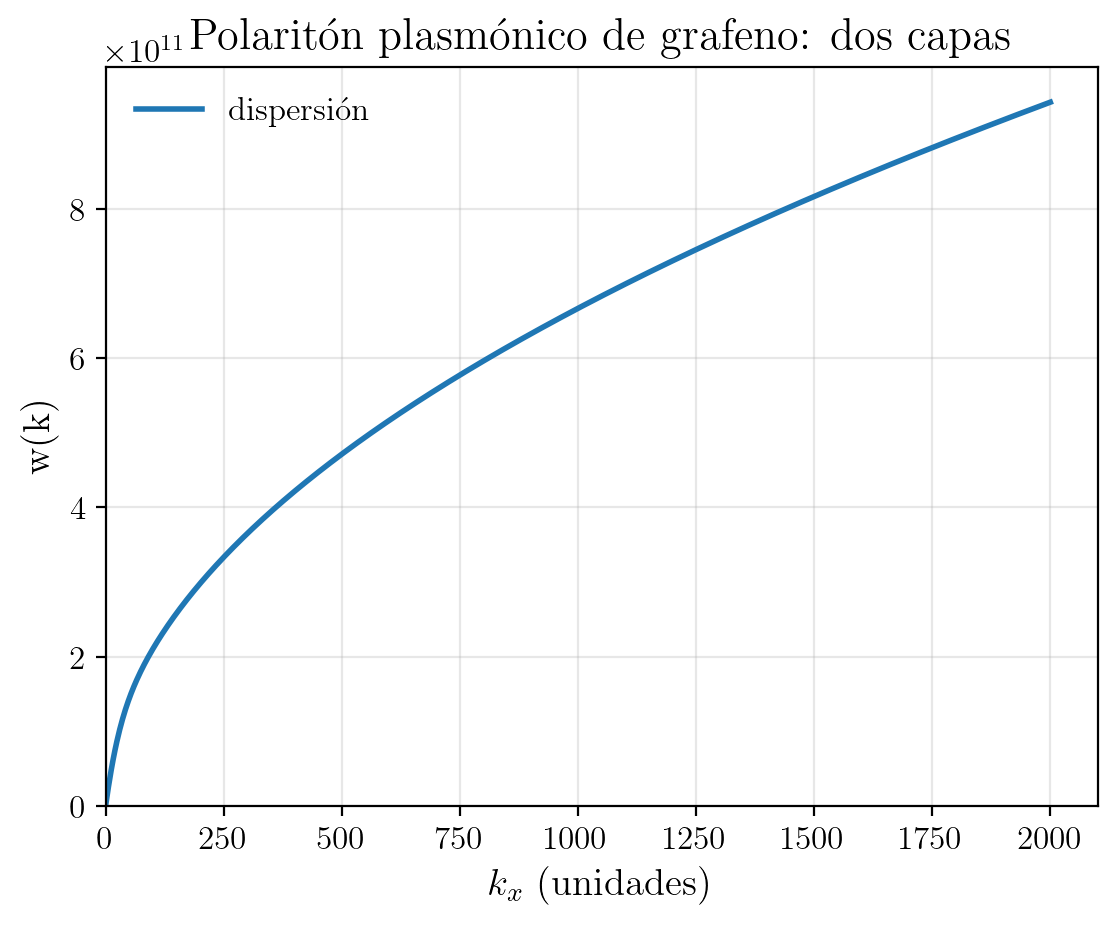

In [132]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno: dos capas") #Título de la gráfica
x = np.linspace(0,2000,1000)
y_1 = np.sqrt((2*x*const.c*w_D*np.sinh(x*d)/(1*np.sinh(x*d)+2*np.cosh(x*d)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y_1,label='dispersión')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper left", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 4. Polaritón plasmónico de grafeno acústico II

Relación de dispersión 

$w^2= \frac{2 c k_x w_D (\epsilon_3 cosh(h_3k_x) senh(h_2k_x)+(2\epsilon_2 cosh(h_2k_x)+\epsilon_1 senh(h_2k_x))senh(h_3k_x)) -\sqrt{2c^2k_x^2w_D^2((-\epsilon_1^2+8\epsilon_2^2+\epsilon_1^2 cosh(2h_2k_x))senh(h_3k_x)^2+2\epsilon_3senh(h_2k_x)^2(\epsilon_3cosh(h_2k_x)^2-\epsilon_1senh(2h_3k_3))}}{2\epsilon_3cosh(h_3k_x)(\epsilon_2cosh(h_2k_x)+\epsilon_1senh(h_2k_x))+2\epsilon_2(\epsilon_1cosh(h_2k_x)+\epsilon_2senh(h_2k_x))senh(h_3k_x)))}$


$w^2= \frac{2 c k_x w_D (\epsilon_3 cosh(h_3k_x) senh(h_2k_x)+(2\epsilon_2 cosh(h_2k_x)+\epsilon_1 senh(h_2k_x))senh(h_3k_x)) +\sqrt{2c^2k_x^2w_D^2((-\epsilon_1^2+8\epsilon_2^2+\epsilon_1^2 cosh(2h_2k_x))senh(h_3k_x)^2+2\epsilon_3senh(h_2k_x)^2(\epsilon_3cosh(h_2k_x)^2-\epsilon_1senh(2h_3k_3))}}{2\epsilon_3cosh(h_3k_x)(\epsilon_2cosh(h_2k_x)+\epsilon_1senh(h_2k_x))+2\epsilon_2(\epsilon_1cosh(h_2k_x)+\epsilon_2senh(h_2k_x))senh(h_3k_x)))}$

Hay algún comportamiento extraño cuando las h_2 $\neq$ h_3. Hay que revisar.

También notar que cuando hamos el límite con d$\to 0$ y $\epsilon_2 \to 1$ obtenemos que una expresión es 0, y la otra es:

$w^2 = \frac{4ck_xw_D sinh(h_3k_x)}{\epsilon_3cosh(h_3k_x)+\epsilon_1sinh(h_3k_x)}$

Hay un factor raíz de dos respecto a la relación de dispersión vista en el apartado #3



In [133]:
#Definición de h_2 y h_3 - parámetro de cuentas
h_2 = 0.03
h_3 = 0.03 # Por ahora arbitrario

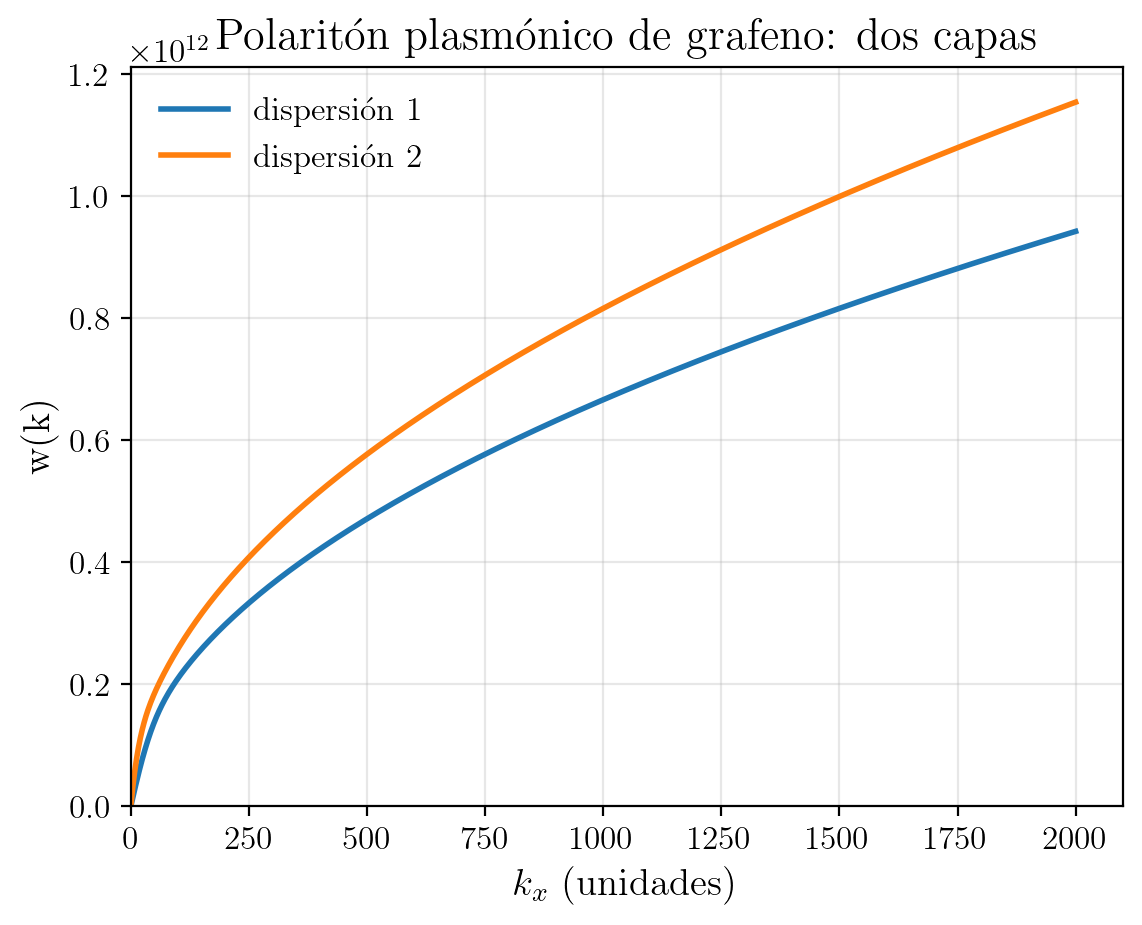

In [134]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno: dos capas") #Título de la gráfica
x = np.linspace(0,2000,1000)


# Epsilon
epsilon_1 = 1
epsilon_2 = 1
epsilon_3 = 2

# Raíz interna
arg_raiz = (
    2 * const.c**2 * x**2 * w_D**2 * (
        (-epsilon_1**2 + 8 * epsilon_2**2 + epsilon_1**2 * np.cosh(2 * h_2 * x)) * np.sinh(h_3 * x)**2 +
        2 * epsilon_3 * np.sinh(h_2 * x)**2 * (epsilon_3 * np.cosh(h_2 * x)**2 - epsilon_1 * np.sinh(2 * h_3 * x))
    )
)

# Parte del numerador antes de la raíz
numerador_antes_raiz = (
    2 * const.c * x * w_D * (
        epsilon_3 * np.cosh(h_3 * x) * np.sinh(h_2 * x) +
        (2 * epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
    )
)

# Denominador completo
denominador = (
    2 * epsilon_3 * np.cosh(h_3 * x) * (epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) +
    2 * epsilon_2 * (epsilon_1 * np.cosh(h_2 * x) + epsilon_2 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
)

# omega (frecuencia) con raíz externa
omega1 = np.sqrt((numerador_antes_raiz - np.sqrt(arg_raiz)) / denominador)
omega2 = np.sqrt((numerador_antes_raiz + np.sqrt(arg_raiz)) / denominador)
               
               
               
     
ax.plot(x,omega1,label='dispersión 1')
ax.plot(x,omega2,label='dispersión 2')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper left", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()


# Materiales polares

## 1. Polaritones fonónicos de volumen

Relación de dispersión $w =  \sqrt{ \frac{c^2 k_x^2 + \varepsilon_\infty \omega_L^2 - \sqrt{(c^2 k_x^2 + \varepsilon_\infty \omega_L^2)^2 - 4 c^2 \varepsilon_\infty k_x^2 \omega_T^2}}{2\varepsilon_\infty} }$ 
 $w =  \sqrt{ \frac{c^2 k_x^2 + \varepsilon_\infty \omega_L^2 + \sqrt{(c^2 k_x^2 + \varepsilon_\infty \omega_L^2)^2 - 4 c^2 \varepsilon_\infty k_x^2 \omega_T^2}}{2\varepsilon_\infty} }$

Vamos a representar tanto para el Si como para el Al

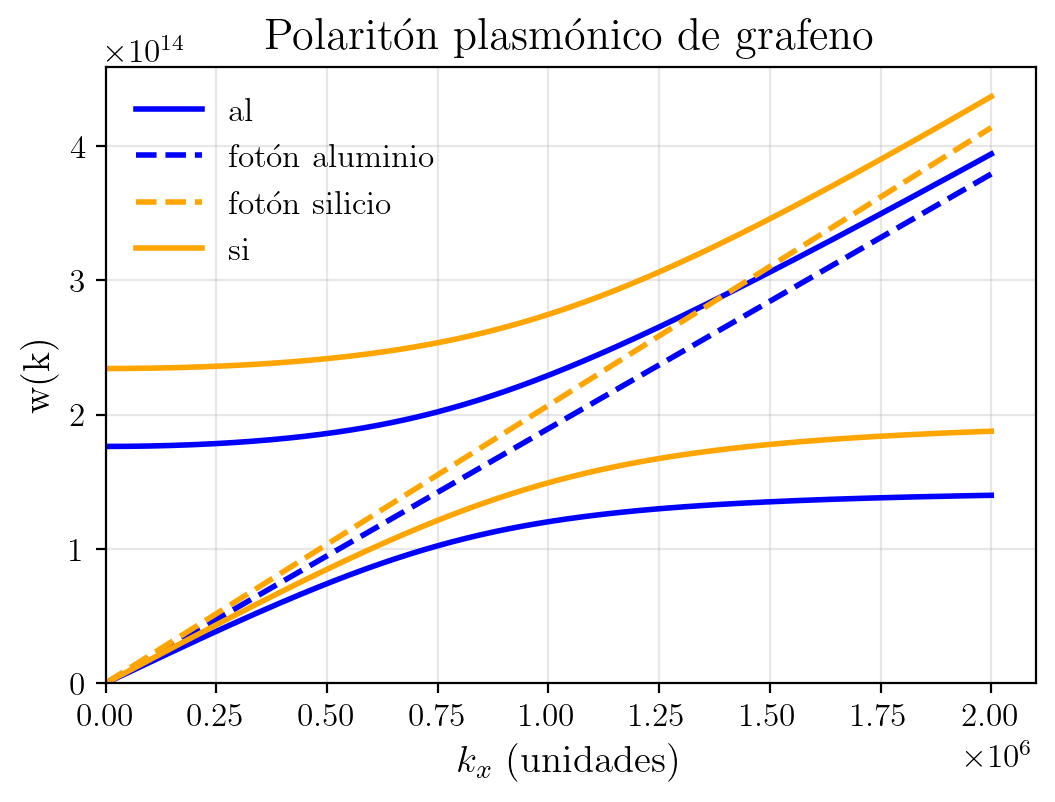

In [135]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritón plasmónico de grafeno") #Título de la gráfica
x = np.linspace(0,2000000,500)

y1al = np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2-np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2)**2-4*const.c**2*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))
y2al = np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2+np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2)**2-4*const.c**2*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))
y1si = np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2-np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2)**2-4*const.c**2*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))
y2si = np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2+np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2)**2-4*const.c**2*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))

ax.plot(x,y1al,label=' al', color='blue')
ax.plot(x,y2al,color='blue')
ax.plot(x,const.c*x/np.sqrt(eps_inf_al),color='blue', linestyle ='--', label='fotón aluminio')
ax.plot(x,const.c*x/np.sqrt(eps_inf_si),color='orange', linestyle ='--',label='fotón silicio')
ax.plot(x,y1si,label=' si', color='orange')
ax.plot(x,y2si,color='orange')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper left", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

Ahora vamos a mostrar la diferencia entre $w_+ - w_-$ para pder ver el mínimo y compararlo con el gap del cruce evitado. Para el valor del mínimo gap del cruce evitado es la intersección entre el valor dado por $w_t$ y la línea de fonones, que para este caso vendrá dada por la ecuación $\varepsilon_{\infty}w^2=c^2k_x^2 \longrightarrow k_{min}=\sqrt{\varepsilon_{\infty}}w_t/c$

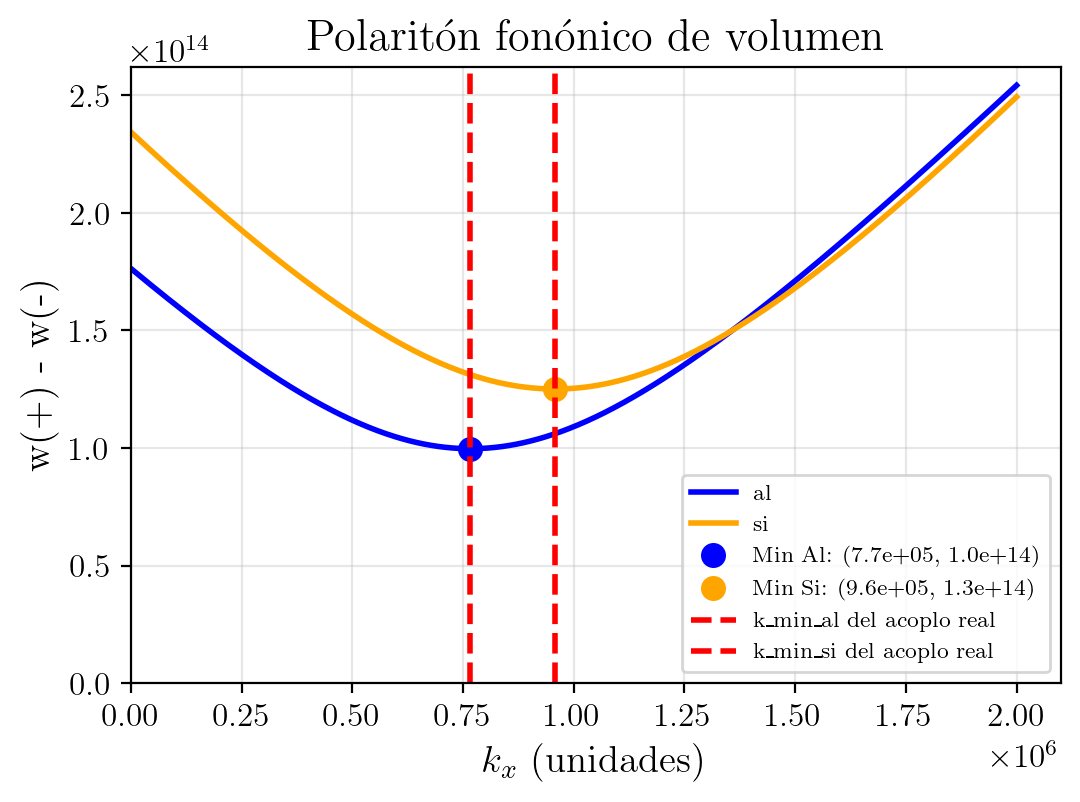

In [136]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritón fonónico de volumen") #Título de la gráfica
x = np.linspace(0,2000000,500)

y1al = np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2-np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2)**2-4*const.c**2*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al)) #omega-
y2al = np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2+np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2)**2-4*const.c**2*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al)) #omega+
y1si = np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2-np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2)**2-4*const.c**2*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si)) #omega-
y2si = np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2+np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2)**2-4*const.c**2*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si)) #omega+

# Cálculo de las funciones finales
y_al = y2al - y1al
y_si = y2si - y1si

ax.plot(x,y_al,label=' al', color='blue')
ax.plot(x,y_si,label=' si', color='orange')

# --- BÚSQUEDA DE MÍNIMOS ---
idx_min_al = np.argmin(y_al)
x_min_al = x[idx_min_al]
y_min_al = y_al[idx_min_al]

idx_min_si = np.argmin(y_si)
x_min_si = x[idx_min_si]
y_min_si = y_si[idx_min_si]
# Marcar los mínimos en la gráfica
ax.plot(x_min_al, y_min_al,'o', markersize=8, 
        label=f'Min Al: ({x_min_al:.1e}, {y_min_al:.1e})',color='blue')
ax.plot(x_min_si, y_min_si, 'o', markersize=8, 
        label=f'Min Si: ({x_min_si:.1e}, {y_min_si:.1e})',color='orange')
plt.axvline(np.sqrt(eps_inf_al)*w_t0_al/const.c, color='r', linestyle='--', linewidth=2, label='k_min_al del acoplo real')
plt.axvline(np.sqrt(eps_inf_si)*w_t0_si/const.c, color='r', linestyle='--', linewidth=2, label='k_min_si del acoplo real')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(+) - w(-)")
ax.legend(loc="lower right", frameon=True, fontsize=8)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 2. Fonones superficiales

Relación de dispersión

$w = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) - \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }$

$w = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) + \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }$


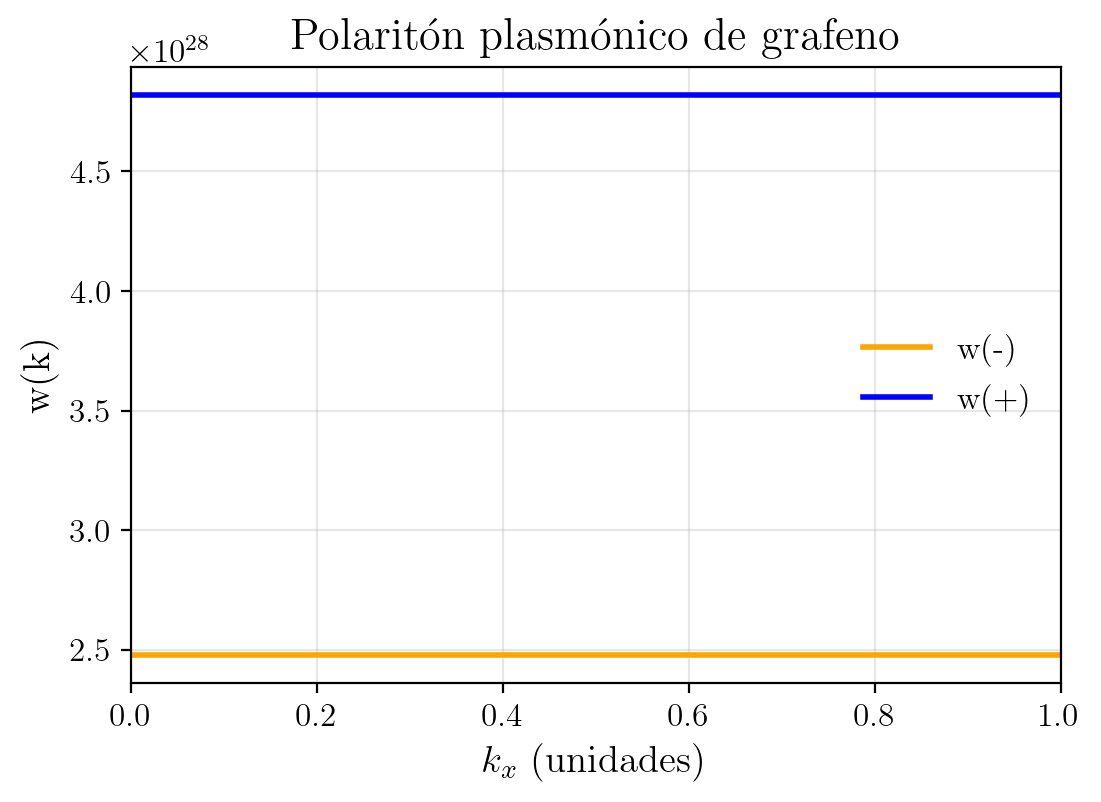

In [148]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritón plasmónico de grafeno") #Título de la gráfica
x = np.linspace(0,2000000,500)

# Términos intermedios
numerador = (
    eps_inf_si * (w_l0_si**2 + w_t0_al**2)
    + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
)

raiz = np.sqrt(
    -4 * (eps_inf_si + eps_inf_al) * (
        eps_inf_si * w_l0_si**2 * w_t0_al**2
        + eps_inf_al * w_l0_al**2 * w_t0_si**2
    ) + numerador**2
)

# Expresión completa para w
y1 = (numerador - raiz) / (2 * (eps_inf_si + eps_inf_al))
y2 = (numerador + raiz) / (2 * (eps_inf_si + eps_inf_al))


plt.axhline(y1,color='orange', label='w(-)')
plt.axhline(y2,color='blue', label='w(+)')




# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="best", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)

plt.show()

## 3. Lámina de material polar de espesor d

Relación de dispersión

$w^2=\frac{\varepsilon_{\infty}w_l^2cosh(k_xh)+\varepsilon_1*w_t^2senh(k_xh)}{\varepsilon_{\infty}cosh(k_xh)+\varepsilon_1senh(k_xh)}$

Cuando d tiende a infinito vamos a tener que:

$w^2=\frac{\varepsilon_{\infty}w_l^2+\varepsilon_1*w_t^2}{\varepsilon_{\infty}+\varepsilon_1}$

In [138]:
#Definición de parámetro altura
h=0.5

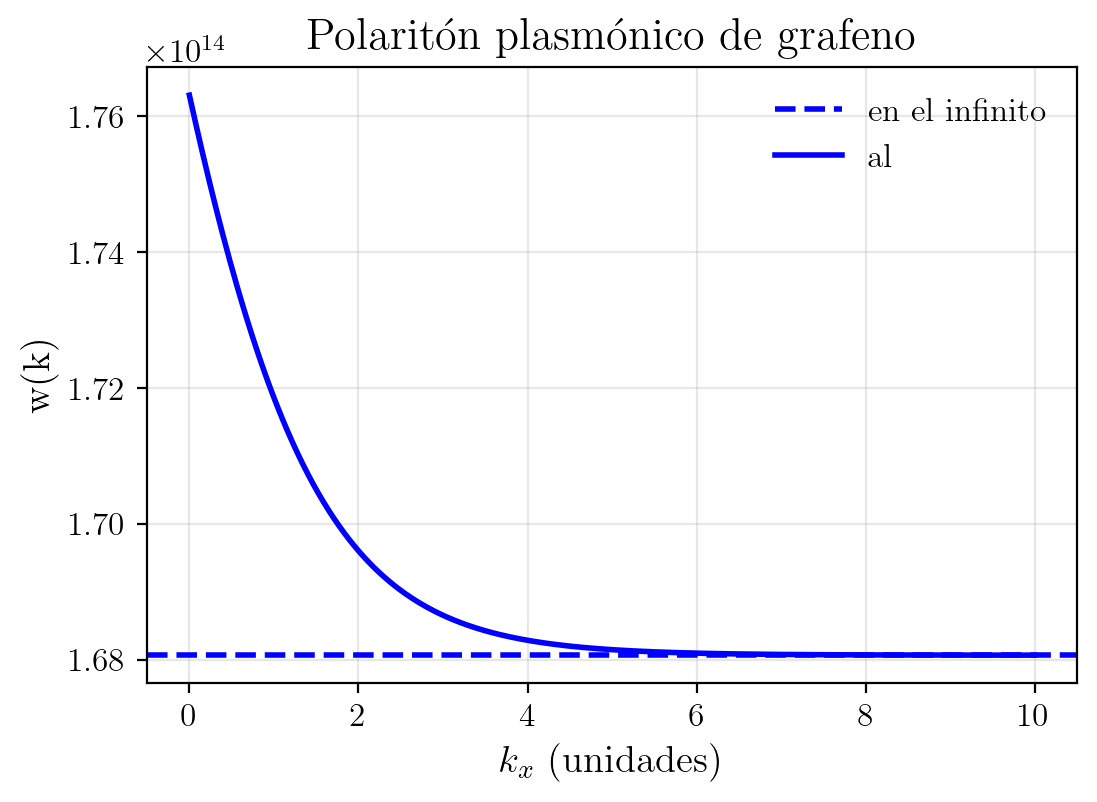

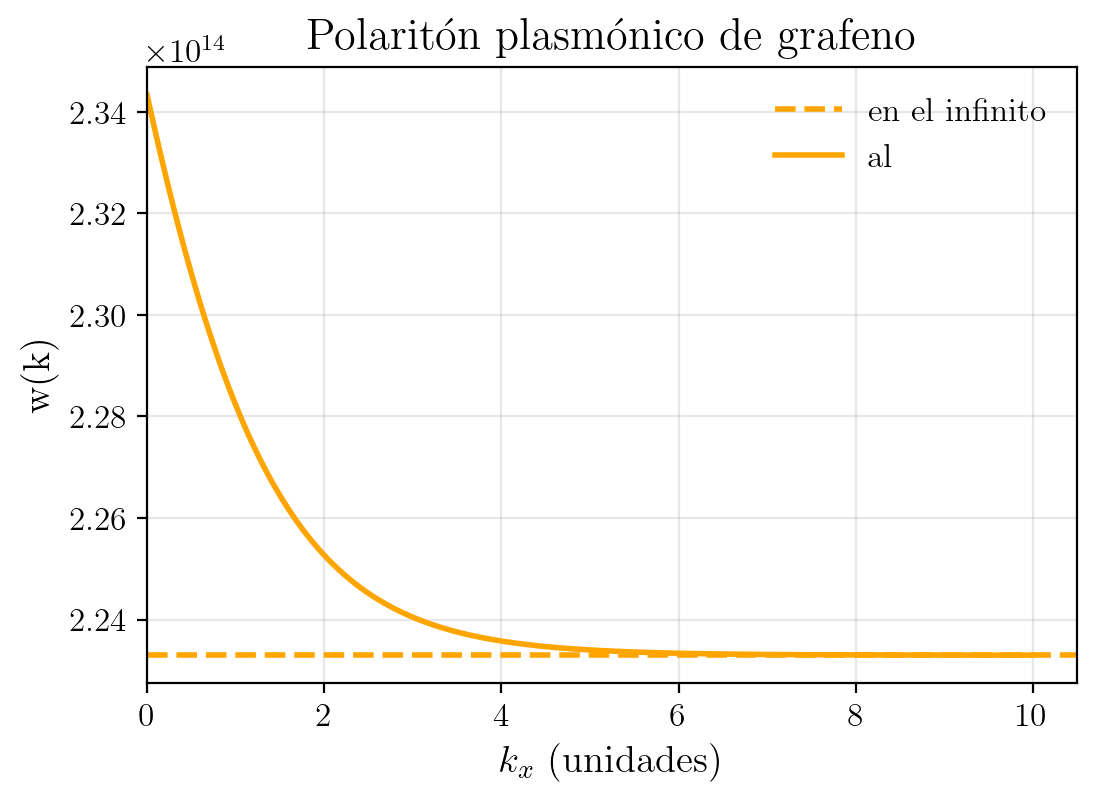

In [139]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritón plasmónico de grafeno") #Título de la gráfica
x = np.linspace(0,10,500)

yal= np.sqrt((eps_inf_al*w_l0_al**2*np.cosh(x*h)+1*w_t0_al**2*np.sinh(x*h))/(eps_inf_al*np.cosh(x*h)+1*np.sinh(x*h)))
infinitoal= np.sqrt((eps_inf_al*w_l0_al**2+1*w_t0_al**2)/(eps_inf_al+1))
plt.axhline(infinitoal,color='blue', linestyle ='--', label='en el infinito')

ax.plot(x,yal,label=' al', color='blue')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper right", frameon=False)
plt.show()
# --- Límites y anotaciones ---
ax.set_xlim(0,)

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritón plasmónico de grafeno") #Título de la gráfica
x = np.linspace(0,10,500)


ysi= np.sqrt((eps_inf_si*w_l0_si**2*np.cosh(x*h)+1*w_t0_si**2*np.sinh(x*h))/(eps_inf_si*np.cosh(x*h)+1*np.sinh(x*h)))
infinitosi= np.sqrt((eps_inf_si*w_l0_si**2+1*w_t0_si**2)/(eps_inf_si+1))
plt.axhline(infinitosi,color='orange', linestyle ='--', label='en el infinito')
ax.plot(x,ysi,label=' al', color='orange')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper right", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)

plt.show()

## 4. Hibridación de polaritones fonónicos superficiales I